In [9]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [10]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [11]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 122kB 13.9MB/s eta 0:00:01


In [12]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [13]:
import paddle
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(paddle.__version__)

2.0.0-rc1


In [14]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data -O housing.data

--2021-01-22 15:16:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [application/x-httpd-php]
Saving to: ‘housing.data’

housing.data        100%[===================>]  47.93K  11.9KB/s    in 4.0s    

2021-01-22 15:16:49 (11.9 KB/s) - ‘housing.data’ saved [49082/49082]



In [15]:
# 从文件导入数据
datafile = './housing.data'
housing_data = np.fromfile(datafile, sep=' ')
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
feature_num = len(feature_names)
# 将原始数据进行Reshape，变成[N, 14]这样的形状
housing_data = housing_data.reshape([housing_data.shape[0] // feature_num, feature_num])

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/conda/envs/

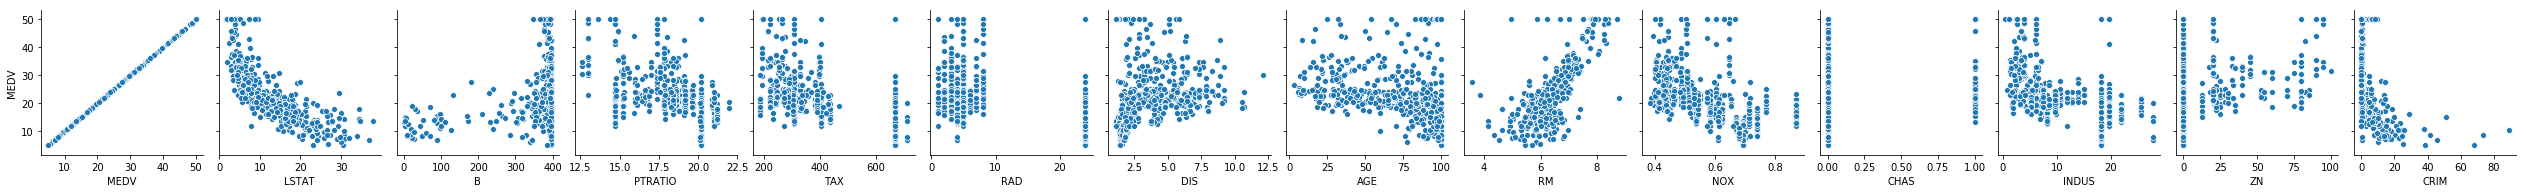

In [16]:
# 画图看特征间的关系,主要是变量两两之间的关系（线性或非线性，有无明显较为相关关系）
features_np = np.array([x[:13] for x in housing_data], np.float32)
labels_np = np.array([x[-1] for x in housing_data], np.float32)
# data_np = np.c_[features_np, labels_np]
df = pd.DataFrame(housing_data, columns=feature_names)
matplotlib.use('TkAgg')
%matplotlib inline
sns.pairplot(df.dropna(), y_vars=feature_names[-1], x_vars=feature_names[::-1], diag_kind='kde')
plt.show()

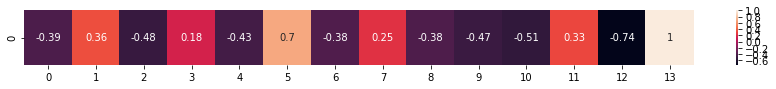

In [17]:
# 相关性分析
fig, ax = plt.subplots(figsize=(15, 1))
corr_data = df.corr().iloc[-1]
corr_data = np.asarray(corr_data).reshape(1, 14)
ax = sns.heatmap(corr_data, cbar=True, annot=True)
plt.show()

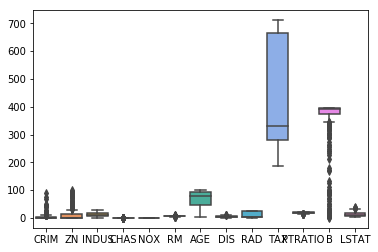

In [18]:
sns.boxplot(data=df.iloc[:, 0:13])

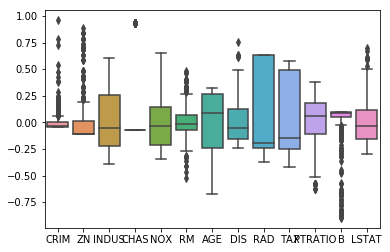

In [19]:
#归一化
features_max = housing_data.max(axis=0)
features_min = housing_data.min(axis=0)
features_avg = housing_data.sum(axis=0) / housing_data.shape[0]
BATCH_SIZE = 20
def feature_norm(input):
    f_size = input.shape
    output_features = np.zeros(f_size, np.float32)
    for batch_id in range(f_size[0]):
        for index in range(13):
            output_features[batch_id][index] = (input[batch_id][index] - features_avg[index]) / (features_max[index] - features_min[index])
    return output_features
#只对属性进行归一化
housing_features = feature_norm(housing_data[:, :13])
# print(feature_trian.shape)
housing_data = np.c_[housing_features, housing_data[:, -1]].astype(np.float32)
# print(training_data[0])
#归一化后的train_data,我们看下各属性的情况
features_np = np.array([x[:13] for x in housing_data],np.float32)
labels_np = np.array([x[-1] for x in housing_data],np.float32)
data_np = np.c_[features_np, labels_np]
df = pd.DataFrame(data_np, columns=feature_names)
sns.boxplot(data=df.iloc[:, 0:13])

In [20]:
#将训练数据集和测试数据集按照8:2的比例分开
ratio = 0.8
offset = int(housing_data.shape[0] * ratio)
train_data = housing_data[:offset]
test_data = housing_data[offset:]

In [21]:
class Regressor(paddle.nn.Layer):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc = paddle.nn.Linear(13, 1,)

    def forward(self, inputs):
        pred = self.fc(inputs)
        return pred

In [22]:
train_nums = []
train_costs = []
#定义绘制训练过程的损失值变化趋势的方法draw_train_process
def draw_train_process(iters, train_costs):
    plt.title("training cost", fontsize=24)
    plt.xlabel("iter", fontsize=14)
    plt.ylabel("cost", fontsize=14)
    plt.plot(iters, train_costs, color='red', label='training cost')
    plt.show()

In [25]:
import paddle.nn.functional as F
y_preds = []
labels_list = []

def train(model):
    print('start training ... ')
    # 开启模型训练模式
    model.train()
    EPOCH_NUM = 500
    train_num = 0
    optimizer = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    for epoch_id in range(EPOCH_NUM):
        # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
        np.random.shuffle(train_data)
        # 将训练数据进行拆分，每个batch包含20条数据
        mini_batches = [train_data[k: k+BATCH_SIZE] for k in range(0, len(train_data), BATCH_SIZE)]
        for batch_id, data in enumerate(mini_batches):
            features_np = np.array(data[:, :13], np.float32)
            labels_np = np.array(data[:, -1:], np.float32)
            features = paddle.to_tensor(features_np)
            labels = paddle.to_tensor(labels_np)
            #前向计算
            y_pred = model(features)
            cost = F.mse_loss(y_pred, label=labels)
            train_cost = cost.numpy()[0]
            #反向传播
            cost.backward()
            #最小化loss，更新参数
            optimizer.step()
            # 清除梯度
            optimizer.clear_grad()

            if batch_id%30 == 0 and epoch_id%50 == 0:
                print("Pass:%d,Cost:%0.5f"%(epoch_id, train_cost))

            train_num = train_num + BATCH_SIZE
            train_nums.append(train_num)
            train_costs.append(train_cost)

model = Regressor()
train(model)

start training ... 
Pass:0,Cost:537.23083
Pass:50,Cost:66.98539
Pass:100,Cost:13.31977
Pass:150,Cost:113.91579
Pass:200,Cost:109.03222
Pass:250,Cost:17.27333
Pass:300,Cost:25.80838
Pass:350,Cost:22.57305
Pass:400,Cost:12.84565
Pass:450,Cost:11.04092


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/conda/envs/

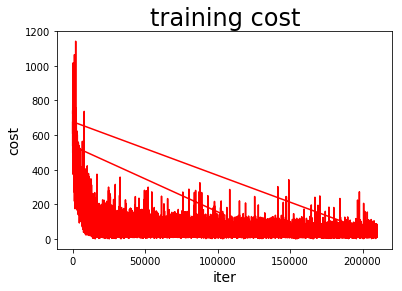

In [26]:
matplotlib.use('TkAgg')
%matplotlib inline
draw_train_process(train_nums, train_costs)

In [27]:
#模型预测
#获取预测数据
INFER_BATCH_SIZE = 100

infer_features_np = np.array([data[:13] for data in test_data]).astype("float32")
infer_labels_np = np.array([data[-1] for data in test_data]).astype("float32")

infer_features = paddle.to_tensor(infer_features_np)
infer_labels = paddle.to_tensor(infer_labels_np)
fetch_list = model(infer_features)

sum_cost = 0
for i in range(INFER_BATCH_SIZE):
    infer_result = fetch_list[i][0]
    ground_truth = infer_labels[i]
    if i % 10 == 0:
        print("No.%d: infer result is %.2f,ground truth is %.2f" % (i, infer_result, ground_truth))
    cost = paddle.pow(infer_result - ground_truth, 2)
    sum_cost += cost
mean_loss = sum_cost / INFER_BATCH_SIZE
print("Mean loss is:", mean_loss.numpy())

No.0: infer result is 12.09,ground truth is 8.50
No.10: infer result is 5.68,ground truth is 7.00
No.20: infer result is 15.19,ground truth is 11.70
No.30: infer result is 16.73,ground truth is 11.70
No.40: infer result is 13.64,ground truth is 10.80
No.50: infer result is 16.24,ground truth is 14.90
No.60: infer result is 18.77,ground truth is 21.40
No.70: infer result is 15.53,ground truth is 13.80
No.80: infer result is 18.21,ground truth is 20.60
No.90: infer result is 21.30,ground truth is 24.50
Mean loss is: [12.968609]


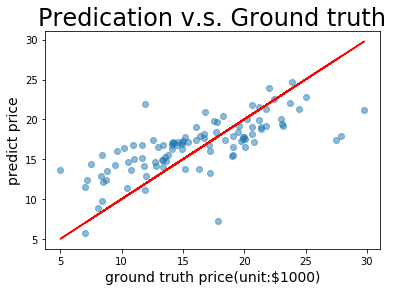

In [28]:
def plot_pred_ground(pred, ground):
    plt.figure()
    plt.title("Predication v.s. Ground truth", fontsize=24)
    plt.xlabel("ground truth price(unit:$1000)", fontsize=14)
    plt.ylabel("predict price", fontsize=14)
    plt.scatter(ground, pred, alpha=0.5)  #  scatter:散点图,alpha:"透明度"
    plt.plot(ground, ground, c='red')
    plt.show()
plot_pred_ground(fetch_list, infer_labels_np)

# 训练方式二
## 我们也可以用我们的高层API来做线性回归训练，高层API相较于底层API更加的简洁方便。

In [29]:
import paddle
paddle.set_default_dtype("float64")

#step1:用高层API定义数据集，无需进行数据处理等，高层API为您一条龙搞定
train_dataset = paddle.text.datasets.UCIHousing(mode='train')
eval_dataset = paddle.text.datasets.UCIHousing(mode='test')

#step2:定义模型
class UCIHousing(paddle.nn.Layer):
    def __init__(self):
        super(UCIHousing, self).__init__()
        self.fc = paddle.nn.Linear(13, 1, None)

    def forward(self, input):
        pred = self.fc(input)
        return pred

#step3:训练模型
model = paddle.Model(UCIHousing())
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),
              paddle.nn.MSELoss())
model.fit(train_dataset, eval_dataset, epochs=5, batch_size=8, verbose=1)

Cache file /home/aistudio/.cache/paddle/dataset/uci_housing/housing.data not found, downloading http://paddlemodels.bj.bcebos.com/uci_housing/housing.data 
Begin to download
............
Download finished
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/distributed/parallel.py:119: UserWarning: Currently not a parallel execution environment, `paddle.distributed.init_parallel_env` will not do anything.
  "Currently not a parallel execution environment, `paddle.distributed.init_parallel_env` will not do anything."


The loss value printed in the log is the current step, and the metric is the average value of previous step.
Epoch 1/5
step 10/51 [====>.........................] - loss: 468.3967 - ETA: 0s - 16ms/step

step 20/51 [==========>...................] - loss: 530.9141 - ETA: 0s - 9ms/step 

step 30/51 [================>.............] - loss: 639.7613 - ETA: 0s - 6ms/step

step 40/51 [======================>.......] - loss: 614.6740 - ETA: 0s - 5ms/step

step 50/51 [============================>.] - loss: 788.3907 - ETA: 0s - 4ms/step

step 51/51 [==============================] - loss: 622.8339 - 4ms/step          


Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 10/13 [======================>.......] - loss: 415.9896 - ETA: 0s - 1ms/step

step 13/13 [==============================] - loss: 396.6727 - 1ms/step          


Eval samples: 102
Epoch 2/5
step 10/51 [====>.........................] - loss: 501.7555 - ETA: 0s - 1ms/step

step 20/51 [==========>...................] - loss: 870.4354 - ETA: 0s - 1ms/step

step 30/51 [================>.............] - loss: 664.3656 - ETA: 0s - 1ms/step

step 40/51 [======================>.......] - loss: 1092.9894 - ETA: 0s - 1ms/step

step 50/51 [============================>.] - loss: 563.4114 - ETA: 0s - 1ms/step 

step 51/51 [==============================] - loss: 424.0740 - 1ms/step          
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 13/13 [==============================] - loss: 394.1055 - 994us/step       
Eval samples: 102
Epoch 3/5
step 51/51 [==============================] - loss: 423.4925 - 1ms/step         
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 13/13 [==============================] - loss: 391.5816 - 850us/step         
Eval samples: 102
Epoch 4/5
step 51/51 [==============================] - loss: 434.5499 - 1ms/step         
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 13/13 [==============================] - loss: 389.0723 - 1ms/step         
Eval samples: 102
Epoch 5/5
step 51/51 [==============================] - loss: 457

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(seq, collections.Sequence) and
